Laplace transforms in SymPy
---------------

The Laplace transform is 

$$\mathcal{L}\{f(t)\} = \int_0^\infty f(t) e^{-st} \mathrm{d}s $$

In [1]:
from sympy import *
init_printing()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's define some symbols to work with. We use `Symbol` here so that we can specify the domains and constraints on the symbols.

In [3]:
t = Symbol('t', real=True)
s = Symbol('s')
a = Symbol('a', real=True, positive=True)

The unit step function is also known as the Heaviside step function. We will see this function often in inverse laplace transforms

In [4]:
Heaviside(t)

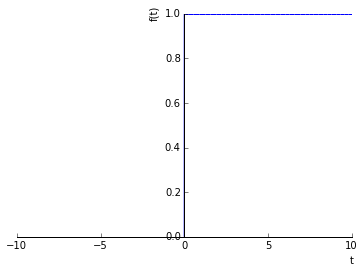

In [5]:
plot(Heaviside(t))

We can calculate Laplace transforms using the `laplace_transform` function. By default it will return conditions of convergence as well.

In [6]:
f = exp(-a*t)
f

In [7]:
laplace_transform(f, t, s)

(1/(a + s), 0, True)

If we want just the function, we can specify `noconds=True`.

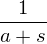

In [8]:
F = laplace_transform(f, t, s, noconds=True)
F

Inverses are simple as well,

In [9]:
inverse_laplace_transform(F, s, t)

Notice the Heaviside function in that answer (it will be typeset at $\theta(t)$), look at the difference:

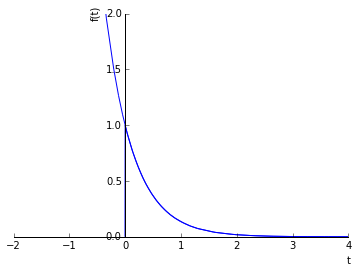

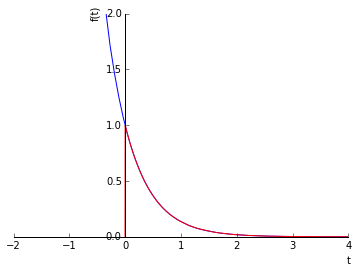

In [10]:
p = plot(exp(-2*t), exp(-2*t)*Heaviside(t), ylim=(0, 2), xlim=(-2, 4))
p[1].line_color = 'red'
p.show()

Let's see if we can match the table

In [11]:
omega = Symbol('omega', real=True)
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

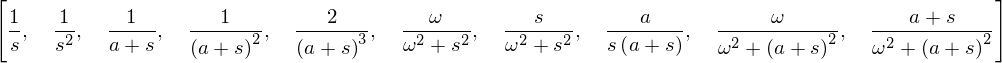

In [12]:
Fs = [laplace_transform(f, t, s, noconds=True) for f in functions]
Fs

We can make a pretty good approximation of the table with a little help from pandas

In [15]:
from pandas import DataFrame

In [16]:
def makelatex(args):
    return ["${}$".format(latex(a)) for a in args]

In [17]:
DataFrame(zip(makelatex(functions), makelatex(Fs)))

,0,1
0,$1$,$\frac{1}{s}$
1,$t$,$\frac{1}{s^{2}}$
2,$e^{- a t}$,$\frac{1}{a + s}$
3,$t e^{- a t}$,$\frac{1}{\left(a + s\right)^{2}}$
4,$t^{2} e^{- a t}$,$\frac{2}{\left(a + s\right)^{3}}$
5,$\sin{\left (\omega t \right )}$,$\frac{\omega}{\omega^{2} + s^{2}}$
6,$\cos{\left (\omega t \right )}$,$\frac{s}{\omega^{2} + s^{2}}$
7,$1 - e^{- a t}$,$\frac{a}{s \left(a + s\right)}$
8,$e^{- a t} \sin{\left (\omega t \right )}$,$\frac{\omega}{\omega^{2} + \left(a + s\right)...
9,$e^{- a t} \cos{\left (\omega t \right )}$,$\frac{a + s}{\omega^{2} + \left(a + s\right)^...


More complicated inverses
---------

Why doesn't the table feature more complicated functions? Because higher-order rational functions can be written as sums of simpler ones through application of partial fractions expansion.

In [20]:
F = ((s - 1)*(s - 2)* (s - 3))/((s - 4)*(s - 5)*(s - 6))

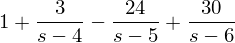

In [22]:
F.apart(s)

Calling `inverse_laplace_transform(F, s, t)` takes a _long_ time on my computer. Calling it with the function expanded is quicker and shows that the inverse is just made up of all the individual term inverses.

In [26]:
inverse_laplace_transform(F.apart(), s, t)